## Target Customer Prediction Using Machine Learning Models

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load data into the pandas dataframe
customer_df = pd.read_csv('P2_Data.csv')

In [3]:
# view the first 5 rows of the data
customer_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,20,-21.42,13.1,464.04,-6.10,-4.50,-18.66,27.54,20.1,-7.08,-16.32,365,0.47,3.40,-3.90,False
1,20,-27.12,13.5,299.04,-6.18,-4.91,-18.66,27.44,18.2,-12.84,-11.07,205,-129.53,7.12,NaN,False
2,20,-33.87,10.5,854.04,-9.32,-7.16,-18.66,25.44,11.9,-5.46,-11.01,330,-44.53,4.62,-3.84,False
3,20,-25.38,19.4,809.04,-12.69,-4.95,-23.66,25.54,19.6,-11.31,-7.53,215,-54.53,2.26,NaN,False
4,20,-23.22,16.0,359.04,-7.70,-4.36,-8.66,26.64,25.8,-12.69,-10.20,85,-134.53,-0.20,-7.76,True


In [4]:
# check the shape of the data
customer_df.shape

(1500, 16)

In [5]:
# check for more information 
customer_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,10.806667,-31.029780,7.708560,387.376000,-9.067533,-7.674867,-11.298000,22.015627,9.93752,-4.958840,-12.037060,109.024667,-63.944000,4.917573,-5.843013
std,9.009814,7.662813,6.930553,214.250623,2.491236,2.545172,7.159315,6.333818,8.65042,7.541549,3.326893,117.334580,40.188448,5.081288,1.005117
min,0.000000,-56.220000,0.000000,149.040000,-16.800000,-16.040000,-28.660000,14.640000,0.00000,-18.390000,-24.750000,0.000000,-164.530000,-4.400000,-8.200000
25%,2.000000,-36.720000,1.200000,221.040000,-10.902500,-9.560000,-18.660000,16.080000,2.48000,-12.180000,-13.770000,15.000000,-79.530000,-0.040000,-6.590000
50%,2.000000,-34.020000,2.040000,281.040000,-10.020000,-8.665000,-7.660000,16.800000,4.14000,-2.010000,-11.580000,50.000000,-58.530000,6.880000,-5.850000
75%,20.000000,-23.542500,14.100000,569.040000,-6.690000,-5.220000,-5.660000,27.540000,16.40000,0.870000,-10.080000,195.000000,-45.530000,8.680000,-5.122500
max,20.000000,-17.610000,20.700000,884.040000,-4.560000,-3.110000,-2.660000,34.940000,31.40000,18.030000,-4.950000,390.000000,50.470000,22.980000,-3.120000


In [6]:
# check for missing values
customer_df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

### Data Cleaning
These is a missing value in feature F15, to handle this we implement a KNN imputer in predicting the missing data points.

In [7]:
# Predicting the missing value using KNN Algorithm
from sklearn.impute import KNNImputer

X = customer_df.copy()
dataset_knn = KNNImputer(n_neighbors=2, weights="uniform")
data_knn = dataset_knn.fit_transform(X)
data_knnimp = data_knn[:, 14]
data_knnimp = pd.DataFrame(data_knnimp, columns=['F15_knn'])

# create a dataframe based on the knn predicted values
customer_df = pd.DataFrame(data_knn, columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
                                             'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'Class'])

In [8]:
customer_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,20.0,-21.42,13.1,464.04,-6.10,-4.50,-18.66,27.54,20.1,-7.08,-16.32,365.0,0.47,3.40,-3.900,0.0
1,20.0,-27.12,13.5,299.04,-6.18,-4.91,-18.66,27.44,18.2,-12.84,-11.07,205.0,-129.53,7.12,-5.595,0.0
2,20.0,-33.87,10.5,854.04,-9.32,-7.16,-18.66,25.44,11.9,-5.46,-11.01,330.0,-44.53,4.62,-3.840,0.0
3,20.0,-25.38,19.4,809.04,-12.69,-4.95,-23.66,25.54,19.6,-11.31,-7.53,215.0,-54.53,2.26,-5.675,0.0
4,20.0,-23.22,16.0,359.04,-7.70,-4.36,-8.66,26.64,25.8,-12.69,-10.20,85.0,-134.53,-0.20,-7.760,1.0


### Feature Scaling
As observed above, there is a varing range of data across all features. This may create biase. To handle this, we implement a min-max normalizer.

In [9]:
# The data is being swamped with data with large absolute values. Hence, the need to scale. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the input data
input_data = customer_df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9','F10', 'F11', 'F12', 'F13', 'F14', 'F15']].to_numpy()
data_scaled = scaler.fit_transform(input_data)
data_scaled_df = pd.DataFrame (data_scaled, columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
                                             'F10', 'F11', 'F12', 'F13', 'F14', 'F15'])

In [10]:
data_scaled_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,1.0,0.901321,0.632850,0.428571,0.874183,0.892498,0.384615,0.635468,0.640127,0.310544,0.425758,0.935897,0.767442,0.284879,0.846457
1,1.0,0.753691,0.652174,0.204082,0.867647,0.860789,0.384615,0.630542,0.579618,0.152389,0.690909,0.525641,0.162791,0.420745,0.512795
2,1.0,0.578866,0.507246,0.959184,0.611111,0.686775,0.384615,0.532020,0.378981,0.355025,0.693939,0.846154,0.558140,0.329438,0.858268
3,1.0,0.798757,0.937198,0.897959,0.335784,0.857695,0.192308,0.536946,0.624204,0.194399,0.869697,0.551282,0.511628,0.243243,0.497047
4,1.0,0.854701,0.772947,0.285714,0.743464,0.903326,0.769231,0.591133,0.821656,0.156507,0.734848,0.217949,0.139535,0.153397,0.086614


### Dimensionality Reduction
To handle poor performance of model as a result of higher number of features, we reduce using the Principal Component Analysis (PCA) into 5 principal features.

Text(0.5, 1.0, "Variance Explained by PCA's")

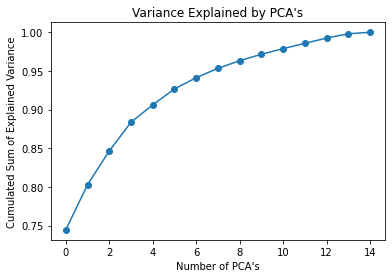

In [11]:
# Find the optimal number of PCA 
reduced_df = data_scaled_df # Define the required data for this analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=reduced_df.shape[1])
pca.fit(reduced_df)
ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(reduced_df.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel("Number of PCA's")
plt.ylabel("Cumulated Sum of Explained Variance")
plt.title("Variance Explained by PCA's")

In [12]:
# Creating PCA object
pca1 = PCA(n_components=5)               
principalComponents = pca1.fit_transform(reduced_df)

#Creating the dataframe
PCA_data = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [13]:
PCA_data.head()

,PC1,PC2,PC3,PC4,PC5
0,0.965187,0.148830,0.311376,0.477471,0.174091
1,0.766148,-0.176972,0.166540,-0.116315,0.195013
2,0.764531,0.340592,-0.229592,0.631896,0.055527
3,1.000639,0.393329,-0.221721,0.096840,-0.020286
4,0.736967,-0.437358,0.018852,-0.497090,0.075759


In [14]:
target_label = customer_df['Class'].astype('int64')
target_label.head()

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

## Model  Development
The following algorithms will be used for the experimentation. They are:
* Decision Tree Classifier
* KNN Classifier
* SVM Classifier
* Random Forest Classifier

## Performance Matrics
To evaluate the performance of our developed models, we will be using the following:
* Confusion matrix
* Classification Accuracy 
* F1 Score (precision & recall) 
* AUC curve

In [15]:
# Create the predicting and target features
X = PCA_data
y = target_label

In [16]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

###  1. Decision Tree Classifier

In [17]:
# import the tree class
from sklearn import tree

# calling and fitting data into the Decision Tree Classifier object
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [18]:
# predict the new data
y_predDT = clf.predict(X_valid)

In [19]:
# check the accuracy score
from sklearn.metrics import accuracy_score

print(f'The classification accuracy score is: {accuracy_score(y_valid, y_predDT)}')

The classification accuracy score is: 1.0


In [20]:
# import the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_valid, y_predDT)
conf_accuracy = ((conf_matrix.diagonal()).sum() / conf_matrix.sum()) * 100

print(f'Decision Tree Confusion matrix = {conf_matrix} \nConfusion matrix accuracy = {round(conf_accuracy, 2)}%')

Decision Tree Confusion matrix = [[248   0]
 [  0 202]] 
Confusion matrix accuracy = 100.0%


In [21]:
# output the classification report
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       202

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## 2. KNN Classifier

In [22]:
# import the neighbors class
from sklearn.neighbors import KNeighborsClassifier

# calling and fitting data into the KNN Classifier object
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, y_train)

In [23]:
# predict the new data
y_predKnn = neigh.predict(X_valid)

In [24]:
# import the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_valid, y_predKnn)
conf_accuracy = ((conf_matrix.diagonal()).sum() / conf_matrix.sum()) * 100

print(f'Decision Tree Confusion matrix = {conf_matrix} \nConfusion matrix accuracy = {round(conf_accuracy, 2)}%')

Decision Tree Confusion matrix = [[216  32]
 [ 30 172]] 
Confusion matrix accuracy = 86.22%


In [25]:
# output the classification report
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predKnn))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       248
           1       0.69      0.67      0.68       202

    accuracy                           0.72       450
   macro avg       0.72      0.72      0.72       450
weighted avg       0.72      0.72      0.72       450



## 3. SVM Classifier

In [26]:
# import the SVM class 
from sklearn import svm

# calling and fitting data into SVM Classifier object
svec = svm.SVC()
svec = svec.fit(X_train, y_train)

In [28]:
# predict the new data
y_predsvm = svec.predict(X_valid)

In [29]:
# import the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_valid, y_predsvm)
conf_accuracy = ((conf_matrix.diagonal()).sum() / conf_matrix.sum()) * 100

print(f'Decision Tree Confusion matrix = {conf_matrix} \nConfusion matrix accuracy = {round(conf_accuracy, 2)}%')

Decision Tree Confusion matrix = [[200  48]
 [ 54 148]] 
Confusion matrix accuracy = 77.33%


In [30]:
# output the classification report
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predsvm))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       248
           1       0.76      0.73      0.74       202

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



## 4. Random Forest Classifier

In [31]:
# import the ensemble class 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# calling and fitting data into the KNN Classifier object
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf = rf.fit(X_train, y_train)

In [32]:
# predict the new data
y_predrf = rf.predict(X_valid)

In [33]:
# import the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_valid, y_predrf)
conf_accuracy = ((conf_matrix.diagonal()).sum() / conf_matrix.sum()) * 100

print(f'Decision Tree Confusion matrix = {conf_matrix}, \nConfusion matrix accuracy = {round(conf_accuracy, 2)}%')

Decision Tree Confusion matrix = [[200  48]
 [ 91 111]], 
Confusion matrix accuracy = 69.11%


In [34]:
# output the classification report
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predrf))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       248
           1       0.70      0.55      0.61       202

    accuracy                           0.69       450
   macro avg       0.69      0.68      0.68       450
weighted avg       0.69      0.69      0.69       450



# Comparative Study

### Confusion Matrix

Text(0.5, 0, 'Score')

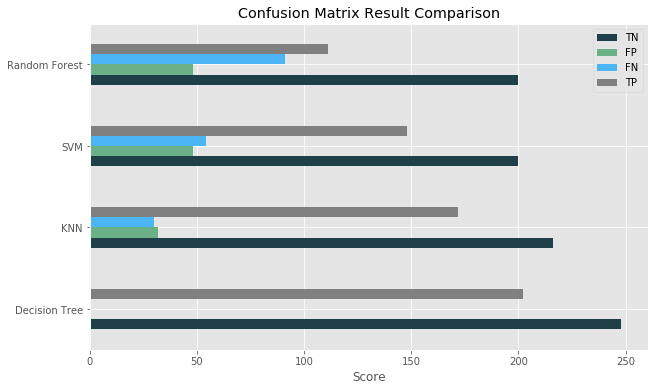

In [35]:
# Creating table for the Confusion matrix
index = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
TN = [248, 216, 200, 200]
FP = [0, 32, 48, 48]
FN = [0, 30, 54, 91]
TP = [202, 172, 148, 111]

conf_table = pd.DataFrame({'TN': TN, 'FP': FP,
                        'FN': FN, 'TP': TP}, index=index)
plt.style.use('ggplot')
ax = conf_table.plot.barh(rot=0, color= ['#1F3F49', '#6AB187', '#4CB5F5', '#808080'], figsize=(10, 6))
plt.title('Confusion Matrix Result Comparison')
plt.xlabel('Score')

### Accuracy Score

In [36]:
# Creating accuracy table
acc_table = pd.DataFrame()
acc_table['Algorithm'] = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
acc_table['Accuracy (%)'] = [100, 86.22, 77.33, 69.11]

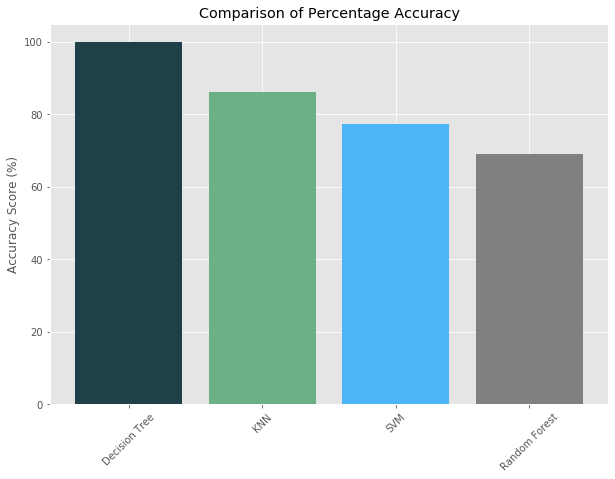

In [37]:
# create the percentage accuracy plot
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.bar(acc_table['Algorithm'], acc_table['Accuracy (%)'], color= ['#1F3F49', '#6AB187', '#4CB5F5', '#808080'])
plt.title('Comparison of Percentage Accuracy')
plt.ylabel('Accuracy Score (%)')
plt.grid(True)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45)

In [38]:
acc_table.head()

,Algorithm,Accuracy (%)
0,Decision Tree,100.00
1,KNN,86.22
2,SVM,77.33
3,Random Forest,69.11


Text(0, 0.5, 'Accuracy Score')

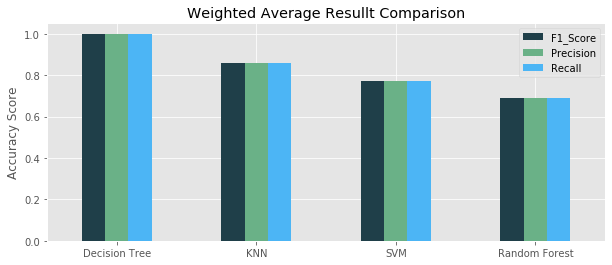

In [39]:
# create the F1, Recall and Precision table
index = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
F1_Score = [1,  0.86, 0.77, 0.69]
Precision = [1, 0.86, 0.77, 0.69]
Recall = [1, 0.86, 0.77, 0.69]

score_df = pd.DataFrame({'F1_Score': F1_Score, 'Precision': Precision,
                       'Recall': Recall}, index=index)

# create the F1, Recall and Precision plot
plt.style.use('ggplot')
ax = score_df.plot.bar(rot=0, color= ['#1F3F49', '#6AB187', '#4CB5F5'], figsize=(10, 4))
plt.title('Weighted Average Resullt Comparison')
plt.ylabel('Accuracy Score')

### AUC curve

Text(0.5, 0.98, 'ROC curve comparison')

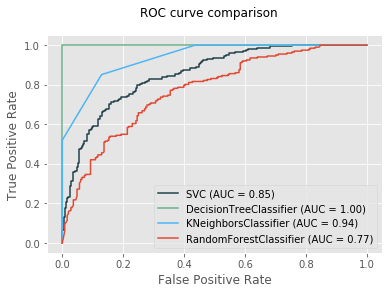

In [40]:
# ploting the AUC plot
from sklearn.metrics import plot_roc_curve

plt.style.use('ggplot')
svc_disp = plot_roc_curve(svec, X_valid, y_valid, color= '#1F3F49')
clf_disp = plot_roc_curve(clf, X_valid, y_valid, ax=svc_disp.ax_, color='#6AB187')
neigh_disp = plot_roc_curve(neigh, X_valid, y_valid, ax=clf_disp.ax_, color='#4CB5F5')
rf_disp = plot_roc_curve(rf, X_valid, y_valid, ax=neigh_disp.ax_)
rf_disp.figure_.suptitle("ROC curve comparison")

## Making Predictions for on the Test Dataset

In [41]:
#y_pred = clf.predict(X_test)

In [42]:
#new_table = pd.DataFrame()

In [43]:
#new_data['Class'] = list(y_pred)

In [44]:
#new_data.head()

## Saving the Test as CSV file

In [45]:
#new_data.to_csv('Test.csv')

### The End !